### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# NLP libraries to clean the text data
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

# Vectorization technique TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# For Splitting the dataset
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report , roc_curve
from sklearn.metrics import  auc, RocCurveDisplay

#Accuracy measuring library
from sklearn.metrics import accuracy_score


## 2. Loading the data

In [2]:
file_path = 'train.csv'
data = pd.read_csv(file_path)

In [3]:
data.shape #Returns the number of rows and columns present in the dataset

(20800, 5)

In [4]:
data.head()  # Returns the first 5 rows of the dataset

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
data.columns # Returns the column headings

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [6]:
data.isnull().sum() #To check the null values in the dataset, if any

id           0
title      558
author    1957
text        39
label        0
dtype: int64

## 3.Data-Preprocessing


In [7]:
df = data.copy() #Creating a copy of my data, I will be working on this Dataframe

In [8]:
df = df.fillna('')   # As Body is empty, just filled with an empty space

In [9]:
df.isnull().sum()  # No null values found

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [10]:
df['News'] = df['author']+df['title']

In [11]:
df.head()

,id,title,author,text,label,News
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...


In [12]:
df.columns

Index(['id', 'title', 'author', 'text', 'label', 'News'], dtype='object')

In [13]:
features_dropped = ['id', 'title', 'author', 'text']
df = df.drop(features_dropped, axis =1)

In [14]:
df.columns

Index(['label', 'News'], dtype='object')

## 4. Text Processing


In [15]:
ps = PorterStemmer()
def wordopt(text):
    text = re.sub('[^a-zA-Z]', ' ',text)
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    return text

In [16]:
df['News'] = df['News'].apply(wordopt) #Applying the text processing techniques onto every row data

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Splitting DataSet

In [18]:
X = df['News']
Y = df['label']

#Split the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

## 5. Vectorization


In [19]:
#Vectorization
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## 6. Model Fitting

In [20]:
#1. Logistic Regression 
LR_model = LogisticRegression()

#Fitting training set to the model
LR_model.fit(xv_train,y_train)

#Predicting the test set results based on the model
lr_y_pred = LR_model.predict(xv_test)

#Calculate the accurracy of this model
score = accuracy_score(y_test,lr_y_pred)
print('Accuracy of LR model is ', score)

Accuracy of LR model is  0.9544230769230769


In [21]:
def conf_matrix(model):
    ConfusionMatrixDisplay.from_estimator(
        model,
        xv_test,
        y_test
    )
def class_report(model):
    print(classification_report(
        y_test,
        model.predict(xv_test)
    ))
def roc(model, model_name):
    Y_pred_svm = model.decision_function(xv_test)
    svm_fpr, svm_tpr, _ = roc_curve(y_test, Y_pred_svm)
    auc_svm = auc(svm_fpr, svm_tpr)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(svm_fpr, svm_tpr, color="darkorange", label=f'{model_name} (auc = %0.3f)' % auc_svm)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()

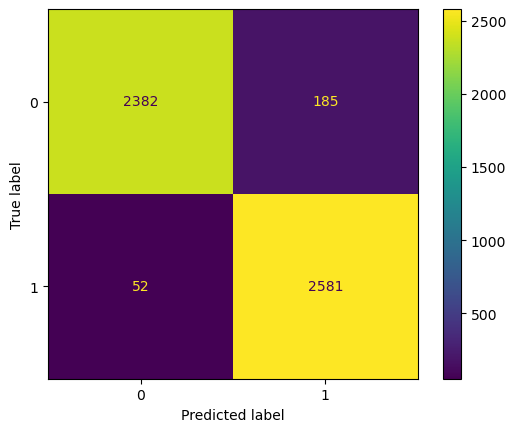

In [22]:
conf_matrix(LR_model)

In [23]:
class_report(LR_model)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2567
           1       0.93      0.98      0.96      2633

    accuracy                           0.95      5200
   macro avg       0.96      0.95      0.95      5200
weighted avg       0.96      0.95      0.95      5200



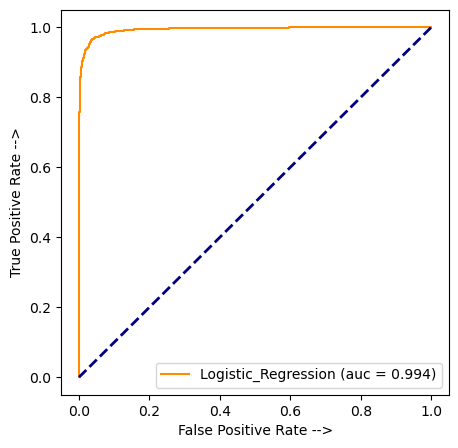

In [24]:
roc(LR_model, 'Logistic_Regression')

In [25]:
#2. Support Vector Machine(SVM) 
svm_model = SVC(kernel='linear')

#Fitting training set to the model
svm_model.fit(xv_train,y_train)

#Predicting the test set results based on the model
svm_y_pred = svm_model.predict(xv_test)

#Calculate the accuracy score of this model
score = accuracy_score(y_test,svm_y_pred)
print('Accuracy of SVM model is ', score)

Accuracy of SVM model is  0.9736538461538462


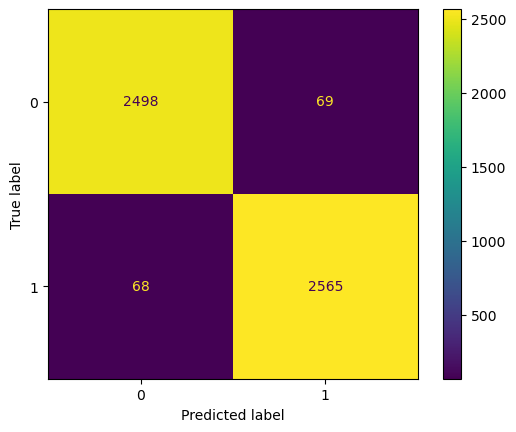

In [26]:
conf_matrix(svm_model)

In [27]:
class_report(svm_model)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2567
           1       0.97      0.97      0.97      2633

    accuracy                           0.97      5200
   macro avg       0.97      0.97      0.97      5200
weighted avg       0.97      0.97      0.97      5200



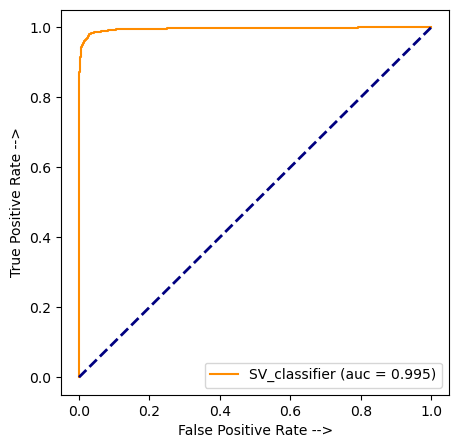

In [28]:
roc(svm_model, 'SV_classifier')

In [29]:
#3. Random Forest Classifier 
RFC_model = RandomForestClassifier(random_state=0)

#Fitting training set to the model
RFC_model.fit(xv_train, y_train)

#Predicting the test set results based on the model
rfc_y_pred = RFC_model.predict(xv_test)

#Calculate the accuracy score of this model
score = accuracy_score(y_test,rfc_y_pred)

print('Accuracy of RFC model is ', score)

Accuracy of RFC model is  0.9755769230769231


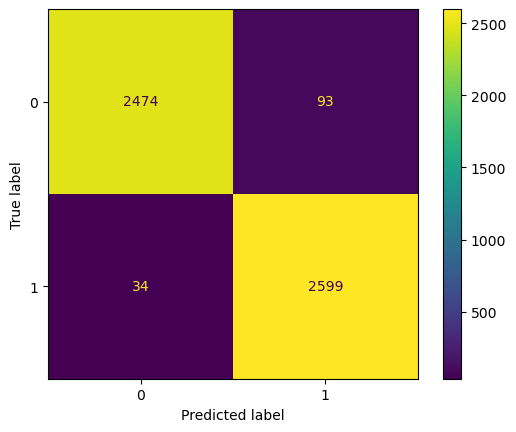

In [30]:
conf_matrix(RFC_model)

In [31]:
class_report(RFC_model)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2567
           1       0.97      0.99      0.98      2633

    accuracy                           0.98      5200
   macro avg       0.98      0.98      0.98      5200
weighted avg       0.98      0.98      0.98      5200



In [32]:
#4 Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB()

#Fitting training set to the model
NB_model.fit(xv_train, y_train)

#Predicting the test set results based on the model
nb_y_pred = NB_model.predict(xv_test)

#Calculate the accuracy score of this model
score = accuracy_score(y_test,nb_y_pred)

print('Accuracy of Naive bayes model is ', score)

Accuracy of Naive bayes model is  0.9076923076923077


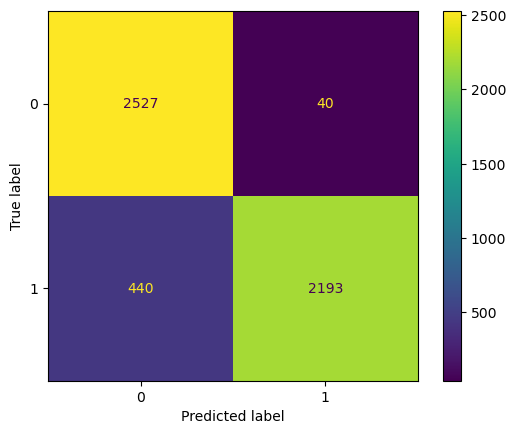

In [33]:
conf_matrix(NB_model)

In [34]:
class_report(NB_model)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2567
           1       0.98      0.83      0.90      2633

    accuracy                           0.91      5200
   macro avg       0.92      0.91      0.91      5200
weighted avg       0.92      0.91      0.91      5200



## 7. Manual Model Testing

In [35]:
# As SVM is able to provide best results 
def fake_news_det(news):
    input_data = {"text":[news]}
    new_def_test = pd.DataFrame(input_data)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    #print(new_x_test)
    vectorized_input_data = vectorization.transform(new_x_test)
    prediction = svm_model.predict(vectorized_input_data)
    
    if prediction == 1:
        print("Real News")
    else:
        print("Fake News")

In [36]:
fake_news_det('U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.')

Fake News


In [37]:

fake_news_det("""The second Covid-19 wave in India is now on the "downswing," the Centre said on Thursday, highlighting that the current number of active cases is still "very high" and advised states and Union territories (UTs) to not let down their guards.""")

Real News


In [38]:
fake_news_det("JetNation FanDuel League; Week 4 of readers think this story is Fact. Add your two cents.(Before Its News)Our FanDuel league is back again this week. Here are the details:$900 in total prize money. $250 to the winner. $10 to enter.Remember this is a one week league, pick your lineup against the salary cap and next week if you want to play again you can pick a completely different lineup if you want.Click this link to enter — http://fanduel.com/JetNation You can discuss this with other NY Jets fans on the Jet Nation message board. Or visit of on Facebook.Source: http://www.jetnation.com/2017/09/27/jetnation-fanduel-league-week-4/")


Real News


In [39]:
import pickle

In [44]:
##Save to file in the current working directory
pkl_filename = "pickle_model.pkl"
with open (pkl_filename, 'wb') as file:
    pickle.dump (svm_model, file)
##Load from file
with open (pkl_filename, 'rb') as file:
    pickle_model = pickle. load(file)
##Calculate the accuracy score and predict target values
score = pickle_model.score(xv_test, y_test)
print ("Test score: {0:.2f} %". format (100 * score) )
predict = pickle_model.predict (xv_test)

Test score: 97.37 %


In [45]:
pickle.dump(vectorization, open('tfidfvect.pkl', 'wb'))

In [46]:
joblib_model = pickle.load(open('pickle_model.pkl', 'rb'))

In [48]:
joblib_vect = pickle.load(open('tfidfvect.pkl', 'rb'))